In [1]:
#import necessary packages and rename
import sys                   #system-specific parameters and functions
import numpy as np           #arrays, matrices, math functions library
import pandas as pd          #data manipulation and analysis library
import matplotlib.pyplot as plt     #plotting library
import seaborn as sns        #data visualization library
import scipy                 #scientific and technical computing library
import sklearn               #classification, regression, clustering algorithms library


#check system versions
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Pandas: {}'.format(pd.__version__))
#print('Matplotlib: {}'.format(plt.__version__))
print('Seaborn: {}'.format(sns.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy: 1.14.3
Pandas: 0.23.0
Seaborn: 0.8.1
Scipy: 1.1.0
Sklearn: 0.19.1


In [2]:
#load the dataset from the csv file using pandas
data = pd.read_csv('creditcard.csv') 

In [3]:
#explore the dataset
print(data.columns) 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
#check data set shape
print(data.shape)

(284807, 31)


In [5]:
#print data
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

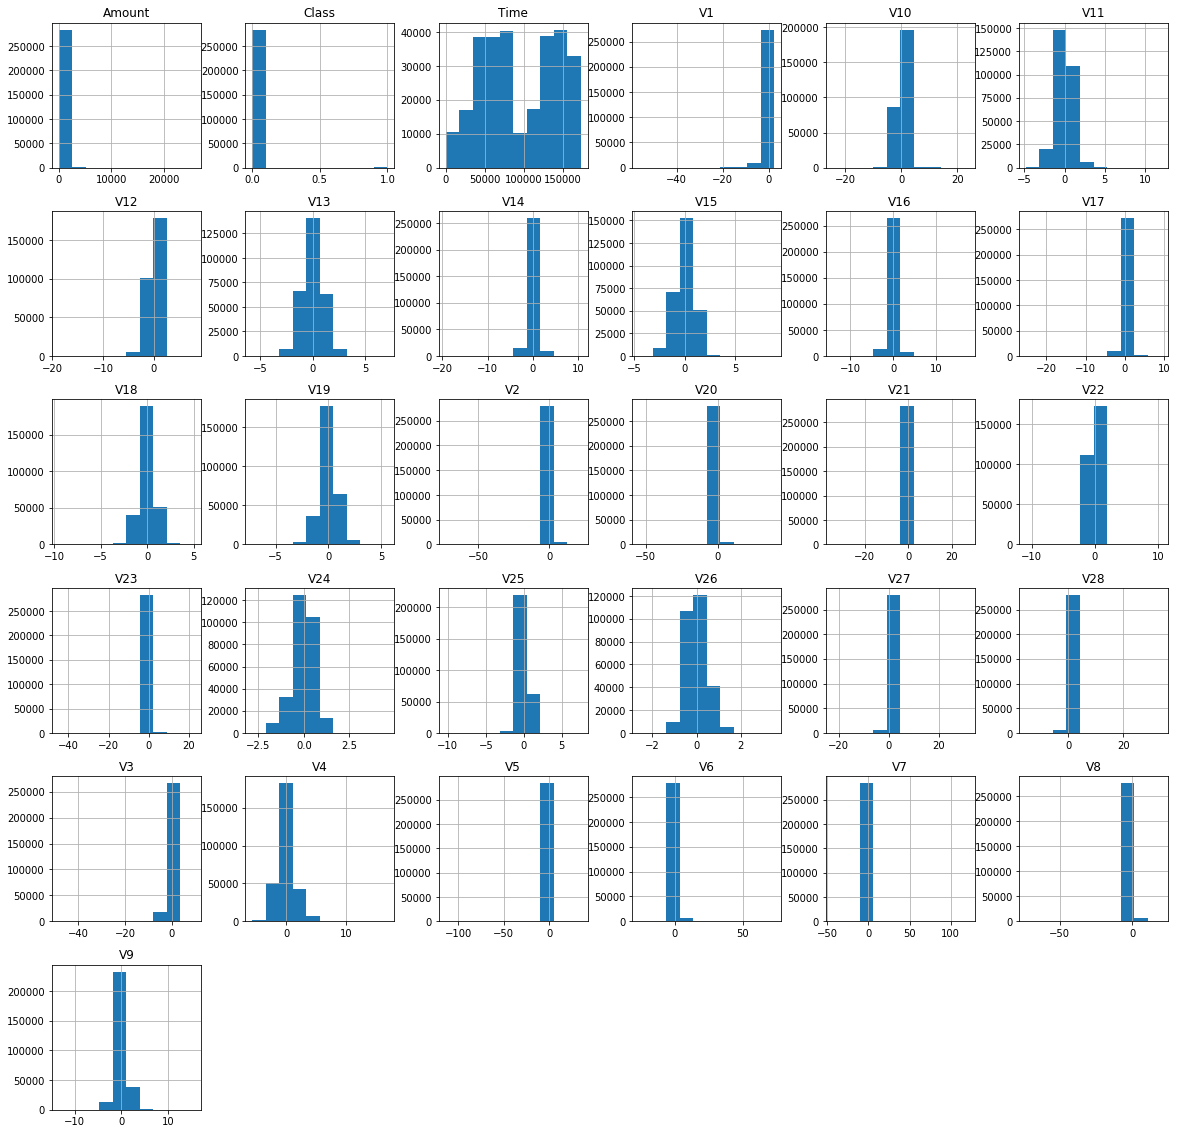

In [6]:
#plot histogram of each parameter
data.hist(figsize=(20,20))
plt.show()

In [7]:
data = data.sample(frac=0.1, random_state = 1)

print(data.shape)

(28481, 31)


In [8]:
#Determine number of fraud cases in dataset
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0017234102419808666
Fraud Cases: 49
Valid Cases: 28432


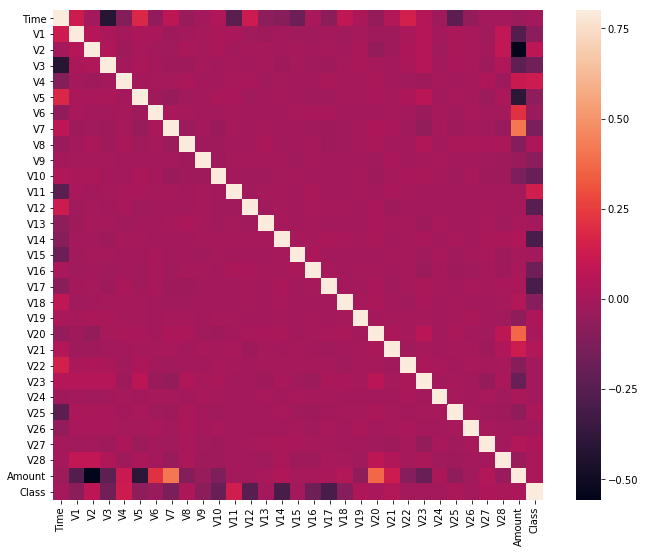

In [9]:
#Correlation Matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [10]:
#Get all the columns from the DataFrame
columns = data.columns.tolist()

#filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

#store variable we will be predicting on
target = "Class"

X = data[columns]
Y = data[target]

#print shapes of X and Y
print(X.shape)
print(Y.shape)

(28481, 30)
(28481,)


In [11]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#define a random state
state = 1

#define the outlier detection methods
#dictionary
classifiers = {
    'Isolation Forest': IsolationForest(max_samples = len(X),
                                       contamination = outlier_fraction, #contamination = number of outliers we think there are
                                       random_state = state),
    'Local Outlier Factor': LocalOutlierFactor(
    n_neighbors = 20,     #goes into nearestneighbors method
    contamination = outlier_fraction)
}


In [12]:
#Fit the model
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    #fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)     #fit columns and predict labels for values, -1 for outlier, 1 for inlier
        scores_pred = clf.negative_outlier_factor_  
    else:     #isolation forest
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    #reshape the prediction values to 0 for valid, 1 for fraud
    y_pred[y_pred==1] = 0
    y_pred[y_pred==-1]= 1
    
    n_errors = (y_pred != Y).sum()
    
    #run classification metrics
    print('{}:{}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))
    

Isolation Forest:71
0.99750711000316
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.28      0.29      0.28        49

avg / total       1.00      1.00      1.00     28481

Local Outlier Factor:97
0.9965942207085425
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     28432
          1       0.02      0.02      0.02        49

avg / total       1.00      1.00      1.00     28481

